# **1. Load and Overview data**

## This dataset contains insights into credit card transactions made in India, offering a comprehensive look at the spending habits of Indians across the nation
### - City: The city in which the transaction took place. (String)
### - Date: The date of the transaction. (Date)
### - Card Type: The type of credit card used for the transaction. (String)
### - Exp Type: The type of expense associated with the transaction. (String)
### - Gender: The gender of the cardholder. (String)
### - Amount: The amount of the transaction. (Number)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('seaborn')

In [ ]:
# !pip install RISE

In [ ]:
# Load data from source
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_Virgil_M4_Exploratory Data Analysis/Milestone Project/Credit card transactions - India - Simple.csv',encoding = "ISO-8859-1")


## Preview data

In [ ]:
data.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [ ]:
df = data.copy()
# How many rows and columns do we have in the data?
df.shape
# There are 7 columns and 26052 rows

(26052, 7)

In [ ]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


## Remove unwanted data

In [ ]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [ ]:
# drop index column
df.drop(columns = ('index'),inplace = True)

In [ ]:
# Change columns names
df.rename(columns = {'Card Type':'Card_type','Exp Type':'Exp_type'}, inplace = True)

In [ ]:
# split country on City columns
df['City'] = df['City'].apply(lambda x: pd.Series(str(x).split(",")[0]))

In [ ]:
df['City'].nunique()
# There are 986 cities on this dataset

986

In [ ]:
df.head()

,City,Date,Card_type,Exp_type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


## Handling duplicated data

In [ ]:
# Check and drop duplicated
df.duplicated().sum()
# There is no duplicated data

0

## Working with Missing Values

In [ ]:
# Check for NaN values
df.isna().sum()
# There is no null values

City         0
Date         0
Card_type    0
Exp_type     0
Gender       0
Amount       0
dtype: int64

## Check and change datatype

In [ ]:
# Adjust column Date_transacion to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace = True)

In [ ]:
df['Month'] = df['Date'].dt.month_name()
# df["Day"]=df["Date"].dt.day_name()
df['Month_n'] = df['Date'].dt.month
df['Month_n'] = df['Month_n'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card_type  26052 non-null  object        
 3   Exp_type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
 6   Month      26052 non-null  object        
 7   Month_n    26052 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.6+ MB


In [ ]:
# Discribe amount of transaction
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,26052.0,156411.537425,103063.254287,1005.0,77120.25,153106.5,228050.0,998077.0


In [ ]:
df.groupby('Card_type')['Amount'].sum()
# df.groupby('Card_type')['Amount'].mean()

Card_type
Gold          984539536
Platinum     1007639019
Signature    1013041105
Silver       1069613713
Name: Amount, dtype: int64

#  **2. Analyse data amount of transaction**

## Distribution of Amount

In [ ]:
# Amount convert to 1k
df['Amount'] = df['Amount']/1000
df.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n
0,Delhi,2014-10-29,Gold,Bills,F,82.475,October,10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8
2,Bengaluru,2014-08-27,Silver,Bills,F,101.738,August,8
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4
4,Bengaluru,2015-05-05,Gold,Bills,F,171.574,May,5


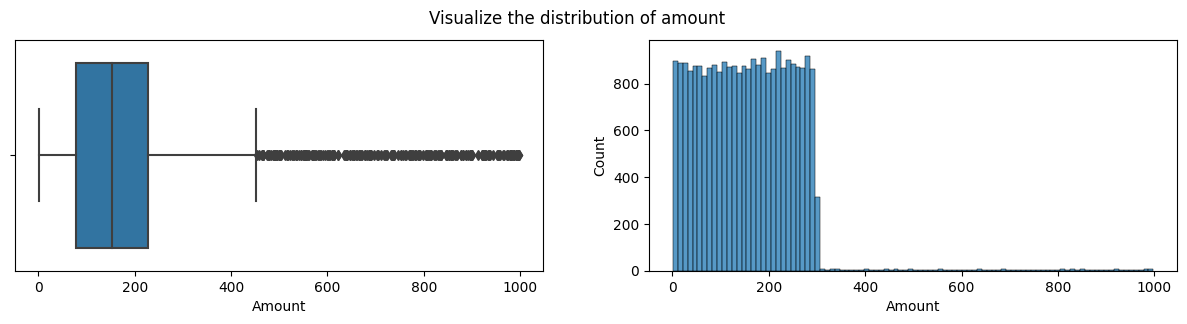

In [ ]:
# Visualize the distribution of Amount
plt.figure(figsize=(15,3))
plt.suptitle('Visualize the distribution of amount')

plt.subplot(121)
sns.boxplot(data = df, x = 'Amount')

plt.subplot(122)
sns.histplot(data = df, x = 'Amount')

plt.show()

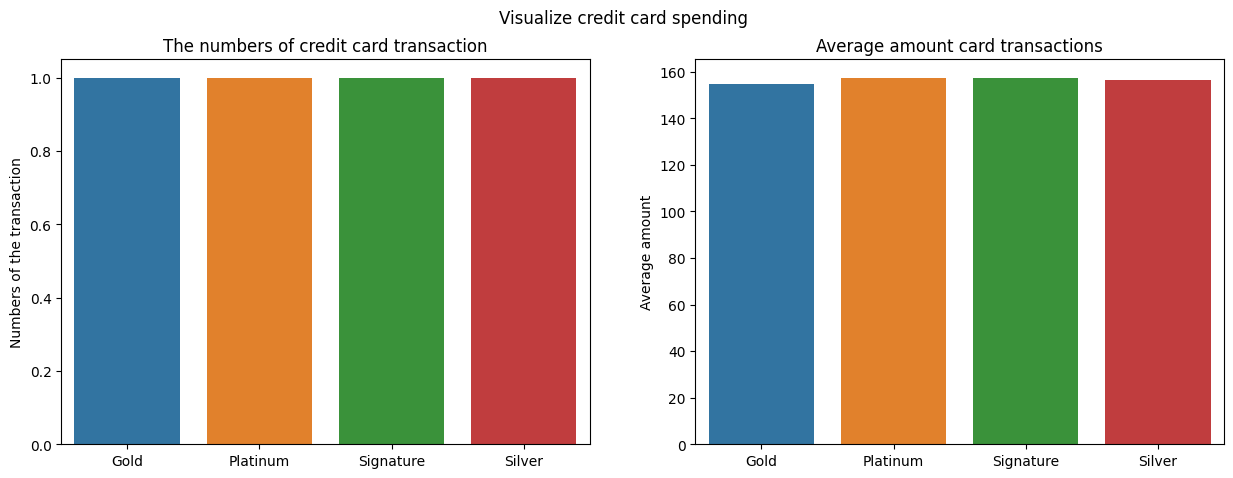

In [ ]:
# df['Amount'].max()
# df['Amount'].min()

# Visualize the distribution of Amount
plt.figure(figsize=(15,5))
plt.suptitle('Visualize credit card spending')

plt.subplot(121)
plt.title('The numbers of credit card transaction')
sns.countplot(data = df.groupby('Card_type').count().reset_index(), x = 'Card_type')
plt.xlabel(None)
plt.ylabel('Numbers of the transaction')

plt.subplot(122)
plt.title('Average amount card transactions')
sns.barplot(data = df.groupby('Card_type')['Amount'].mean().reset_index(), x = 'Card_type', y ='Amount')
plt.xlabel(None)
plt.ylabel('Average amount')

plt.show()

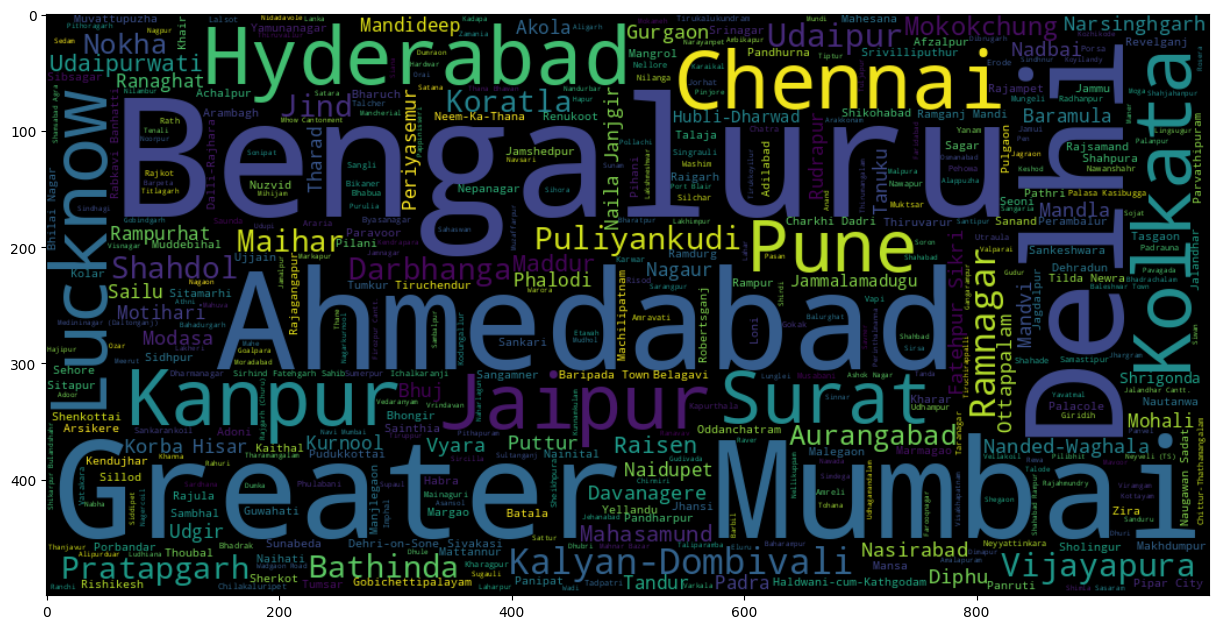

In [ ]:
# CODE SNIPPET TO CREATE A WORD CLOUD
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(15, 8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# The syntax requires parameter as a body of text.
d = df['City'].value_counts()
words = WC.generate_from_frequencies(d)

plt.imshow(words, interpolation="bilinear")
plt.show()

## Females were more depend on credit cards, they spend more amount on credit cards than men.

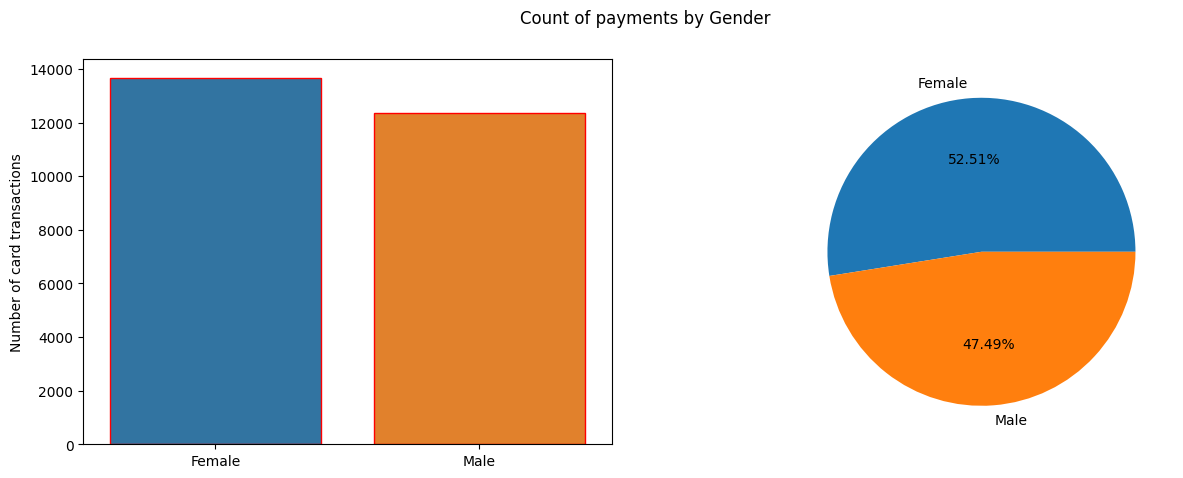

In [ ]:
# Which gender has more counts (number of payments)
plt.figure(figsize=(15,5))
plt.suptitle('Count of payments by Gender')
plt.subplot(121)
sns.countplot(data = df, x = 'Gender', edgecolor='red')
plt.xticks(ticks = [0,1],labels=['Female','Male'])
plt.xlabel(None)
plt.ylabel('Number of card transactions')

plt.subplot(122)
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],autopct = '%0.2f%%')
plt.show()

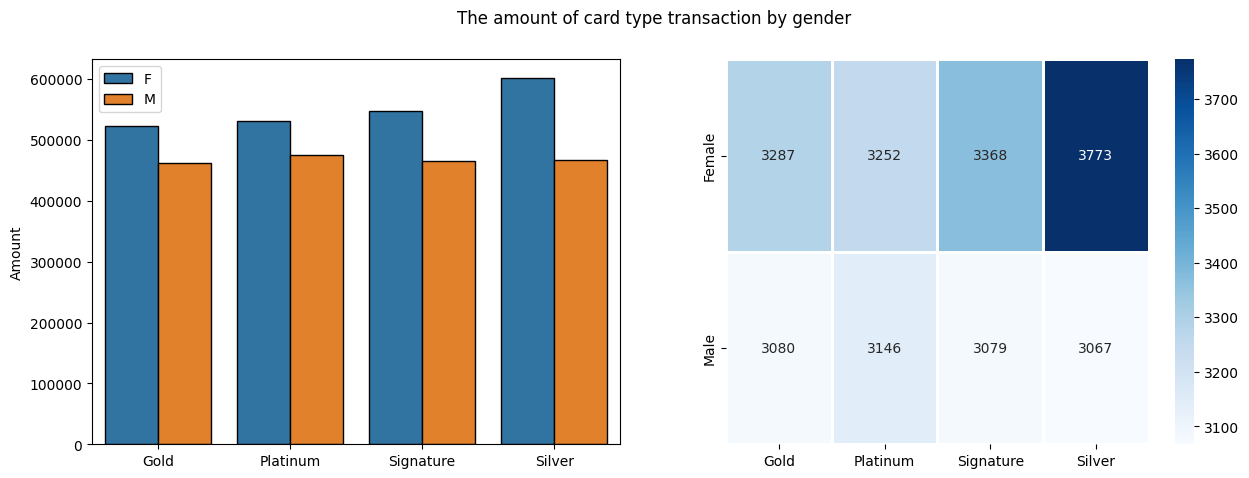

In [ ]:
#The amount of card_type transaction by gender
amount_cardtype = df.groupby(['Card_type','Gender'])['Amount'].sum().reset_index()
amount_cardtype1 =pd.pivot_table(data = df, index = 'Gender', columns = 'Card_type', values ='Amount',aggfunc = 'count')

plt.figure(figsize=(15,5))
plt.suptitle('The amount of card type transaction by gender')

plt.subplot(121)
sns.barplot(data = amount_cardtype, x = 'Card_type', y = 'Amount', hue = 'Gender', edgecolor='black')
plt.xlabel(None)
plt.legend(loc ='upper left')

plt.subplot(122)
sns.heatmap(data = amount_cardtype1, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white' )
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(ticks = [0.5,1.5],labels=['Female','Male'])

plt.show()

## Compare payment rates on different types of credit cards

In [ ]:
print(df['Card_type'].value_counts().sort_values(ascending = False))
print('-'*100)
print(df.groupby('Card_type')['Amount'].sum().sort_values(ascending = False))


Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card_type, dtype: int64
----------------------------------------------------------------------------------------------------
Card_type
Silver       1069613.713
Signature    1013041.105
Platinum     1007639.019
Gold          984539.536
Name: Amount, dtype: float64


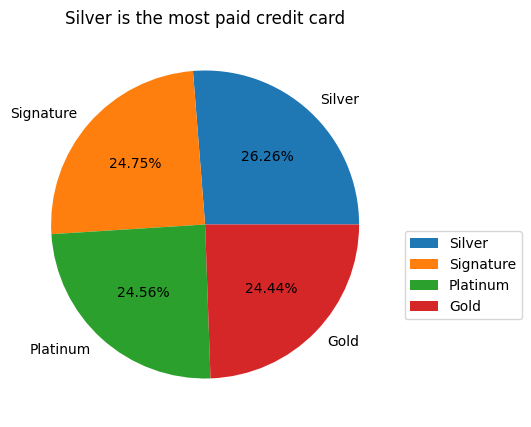

In [ ]:
#Card type
plt.figure(figsize = (15,5))

plt.title('Silver is the most paid credit card')
plt.pie(df['Card_type'].value_counts(),labels=['Silver','Signature','Platinum','Gold'],autopct = '%0.2f%%')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.show()

## Analysis type of expense associated with the transactions

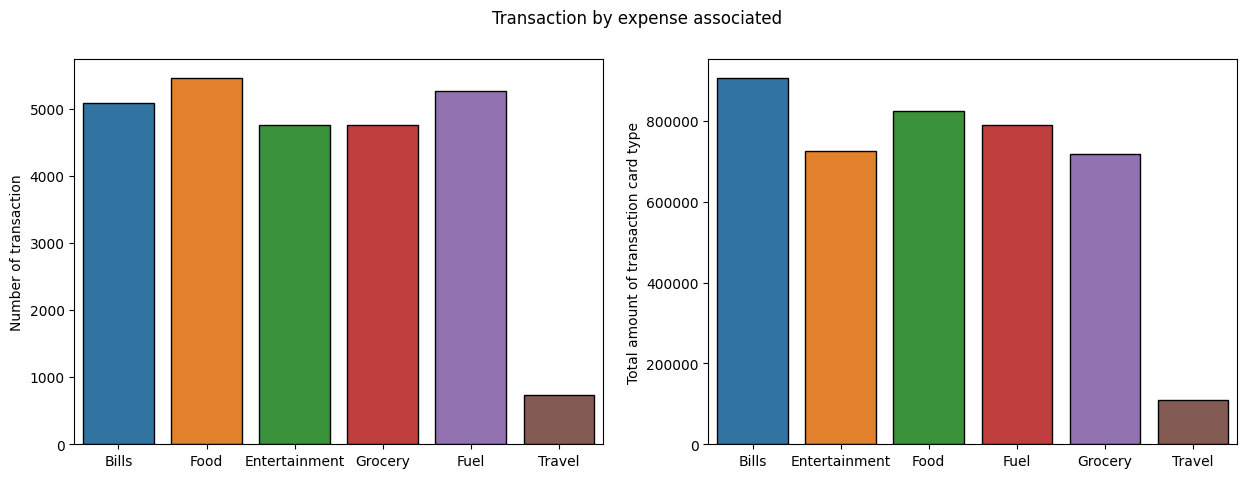

In [ ]:
plt.figure(figsize = (15,5))
plt.suptitle('Transaction by expense associated')

plt.subplot(121)
plt.title('')
sns.countplot(df,x='Exp_type',edgecolor='black')
plt.xlabel(None)
plt.ylabel('Number of transaction')

plt.subplot(122)
plt.title('')
sns.barplot(df.groupby('Exp_type')['Amount'].sum().reset_index(),x ='Exp_type', y = 'Amount', edgecolor='black')
plt.xlabel(None)
plt.ylabel('Total amount of transaction card type')

plt.show()

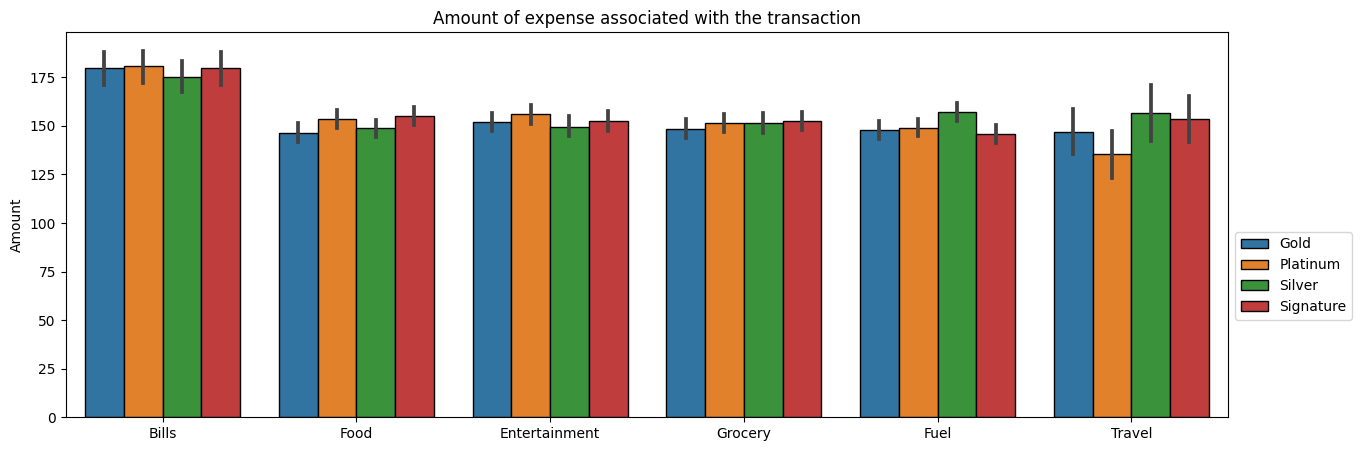

In [ ]:
# Type credit card payment by transaction
plt.figure(figsize=(15,5))
plt.title('Amount of expense associated with the transaction')
sns.barplot(data = df, x = 'Exp_type', y = 'Amount', hue= 'Card_type',edgecolor='black')
plt.legend(loc = 'best',bbox_to_anchor=(1.0, 0.5))
plt.xlabel(None)
# plt.ylabel('')
plt.show()

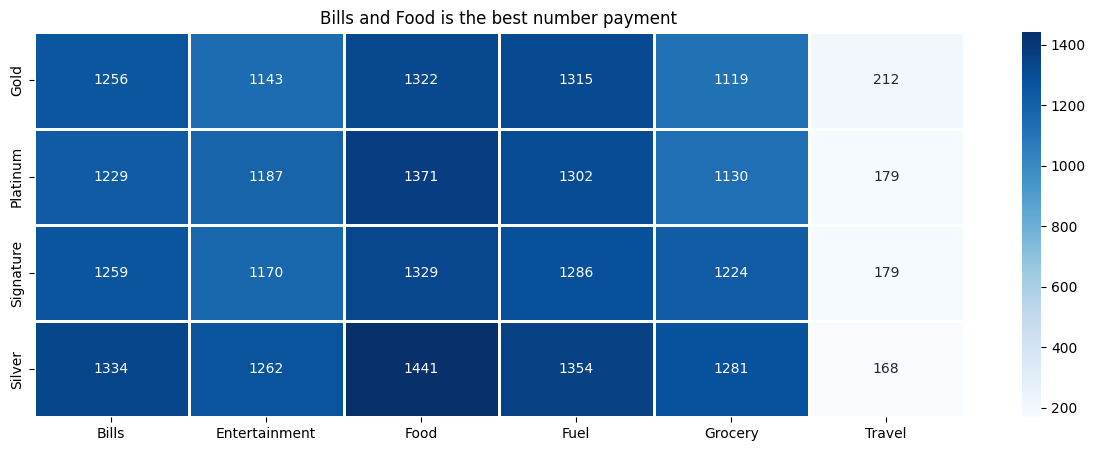

In [ ]:
plot_data = pd.pivot_table(data = df,
               index = 'Card_type',
               columns = 'Exp_type',
               values = 'Amount',
               aggfunc = 'count')

plt.figure(figsize=(15,5))
plt.title('Bills and Food is the best number payment')
sns.heatmap(data = plot_data, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white' )
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Card payment revenue by month of the year

In [ ]:
df['Month'].unique()

array(['October', 'August', 'April', 'May', 'September', 'February',
       'June', 'March', 'December', 'November', 'July', 'January'],
      dtype=object)

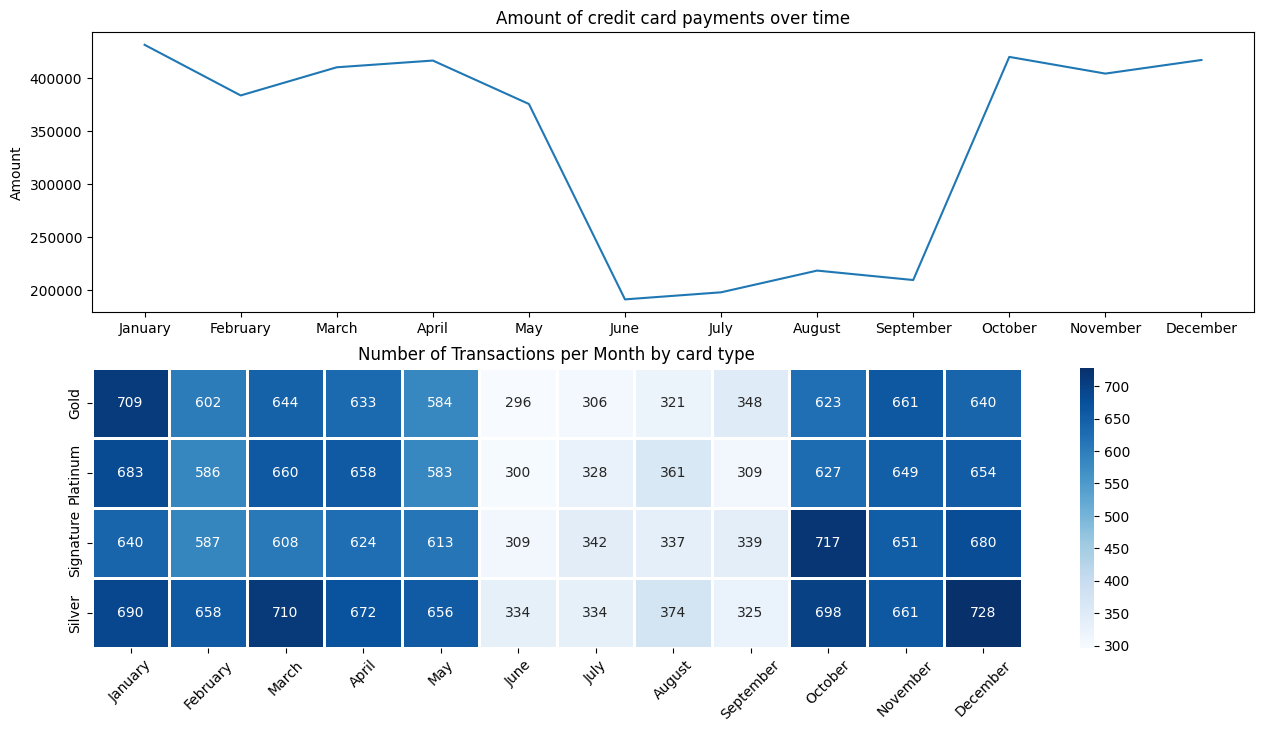

In [ ]:
df_month = df.groupby('Month')['Amount'].sum()[['January','February','March', 'April', 'May','June','July', 'August', 'September','October', 'November','December']].reset_index()
plot_data_time = pd.pivot_table(data = df,
                  index = 'Card_type',
                  columns = 'Month',
                  values = 'Amount',
                  aggfunc = 'count')

plot_data_time = plot_data_time[['January', 'February','March','April','May', 'June', 'July', 'August', 'September', 'October', 'November','December']]

# which card type was mostly used by gender
plt.figure(figsize=(15,8))

plt.subplot(211)
plt.title('Amount of credit card payments over time')
sns.lineplot(data = df_month, x = 'Month', y ='Amount',)
plt.xlabel(None)

plt.subplot(212)
plt.title('Number of Transactions per Month by card type')
sns.heatmap(data = plot_data_time, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='center')

plt.show()

# **3. Top 10 city highest amount was spend by credit card**

In [ ]:
df1=df.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index().head(10)

top_city = pd.merge(df1,df,how='inner',on = 'City')
top_city.drop(columns='Amount_x',inplace = True)
top_city.rename(columns = {'Amount_y':'Amount'},inplace = True)

In [ ]:
top_city.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n
0,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8
1,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4
2,Greater Mumbai,2014-06-26,Platinum,Bills,F,150.980,June,6
3,Greater Mumbai,2013-12-07,Signature,Bills,F,278.036,December,12
4,Greater Mumbai,2014-08-07,Gold,Bills,F,19.226,August,8


In [ ]:
top_city['City'].unique()

array(['Greater Mumbai', 'Bengaluru', 'Ahmedabad', 'Delhi', 'Kolkata',
       'Lucknow', 'Chennai', 'Hyderabad', 'Surat', 'Kanpur'], dtype=object)

In [ ]:
top_city.shape[0]/df.shape[0]

0.7147627821280516

In [ ]:
top_city['Amount'].sum()/df['Amount'].sum()

0.7270687276762913

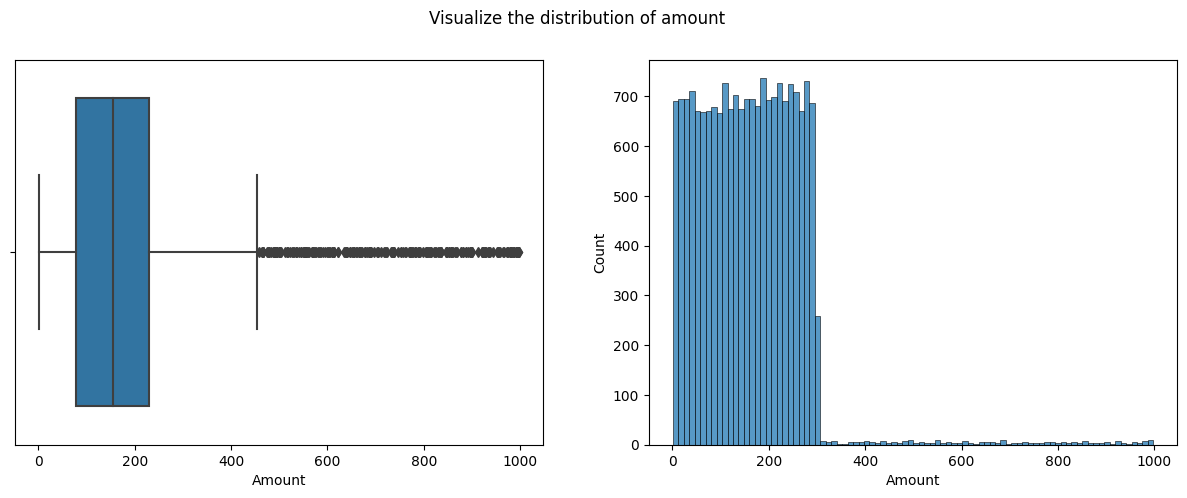

In [ ]:
# Visualize the distribution of Amount
plt.figure(figsize=(15,5))
plt.suptitle('Visualize the distribution of amount')

plt.subplot(121)
sns.boxplot(data = top_city, x = 'Amount')

plt.subplot(122)
sns.histplot(data = top_city, x = 'Amount')

plt.show()

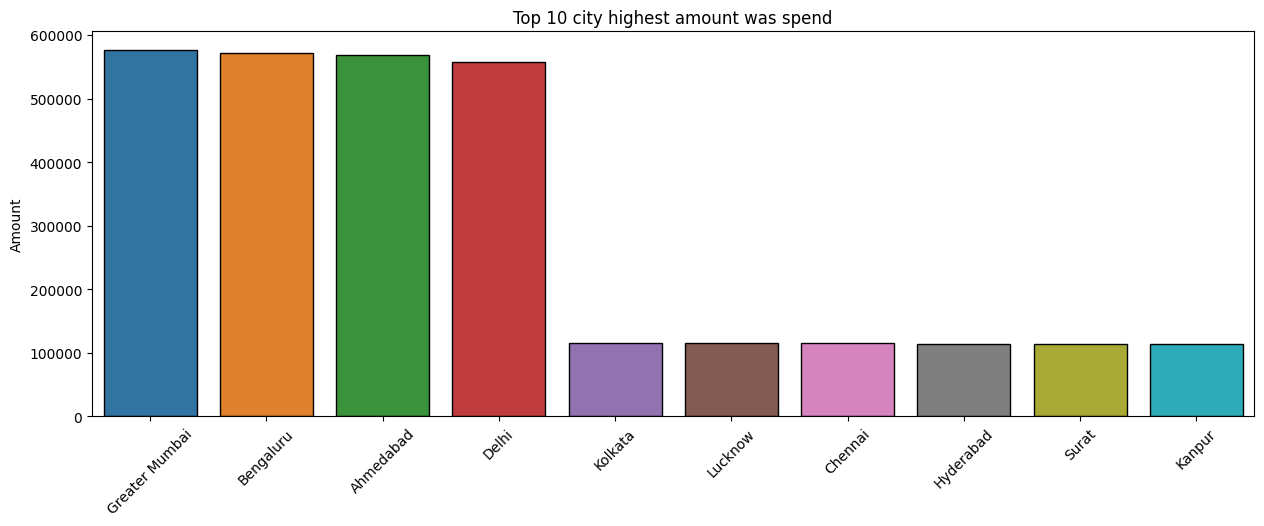

In [ ]:
plot_data = top_city.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,5))
plt.title('Top 10 city highest amount was spend')
sns.barplot(plot_data, x= 'City', y= 'Amount', edgecolor='black')
plt.xticks(rotation = 45)
plt.xlabel(None)

plt.show()

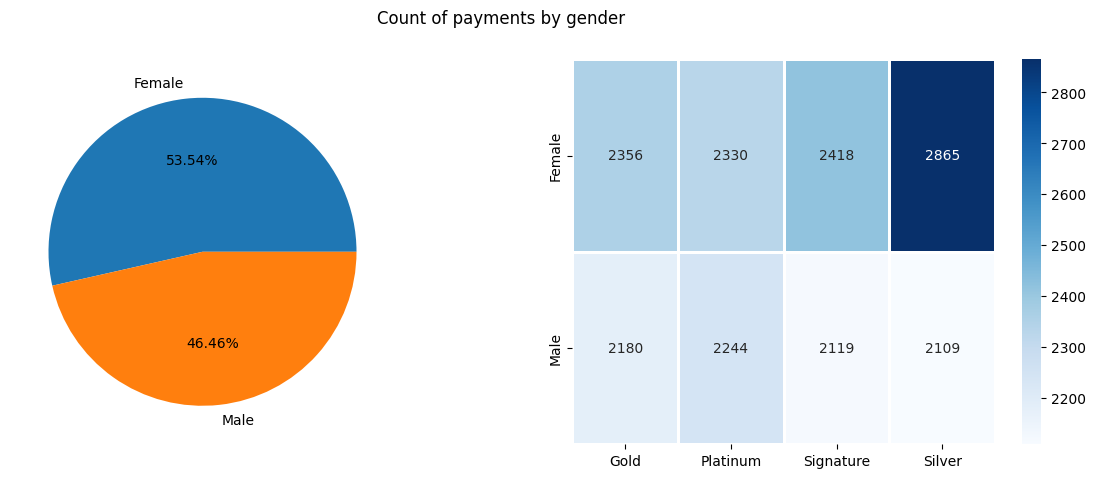

In [ ]:
# Which gender has more counts (number of payments)
amount_cardtype1 =pd.pivot_table(data = top_city, index = 'Gender', columns = 'Card_type', values ='Amount',aggfunc = 'count')

plt.figure(figsize=(15,5))
plt.suptitle('Count of payments by gender')
plt.subplot(122)
sns.heatmap(data = amount_cardtype1, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white')
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(ticks = [0.5,1.5],labels=['Female','Male'])

plt.subplot(121)
plt.pie(top_city['Gender'].value_counts(),labels=['Female','Male'],autopct = '%0.2f%%')
plt.show()

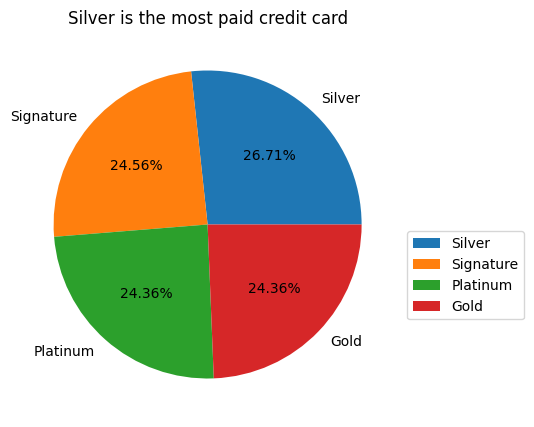

In [ ]:
plt.figure(figsize = (15,5))

# plt.subplot(121)
# plt.title('Female spend more amount on credit card')
# plt.pie(top_city['Gender'].value_counts(),labels=['Female','Male'],autopct = '%0.2f%%')
# plt.subplot(122)

plt.title('Silver is the most paid credit card')
plt.pie(top_city['Card_type'].value_counts(),labels=['Silver','Signature','Platinum','Gold'],autopct = '%0.2f%%')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.show()

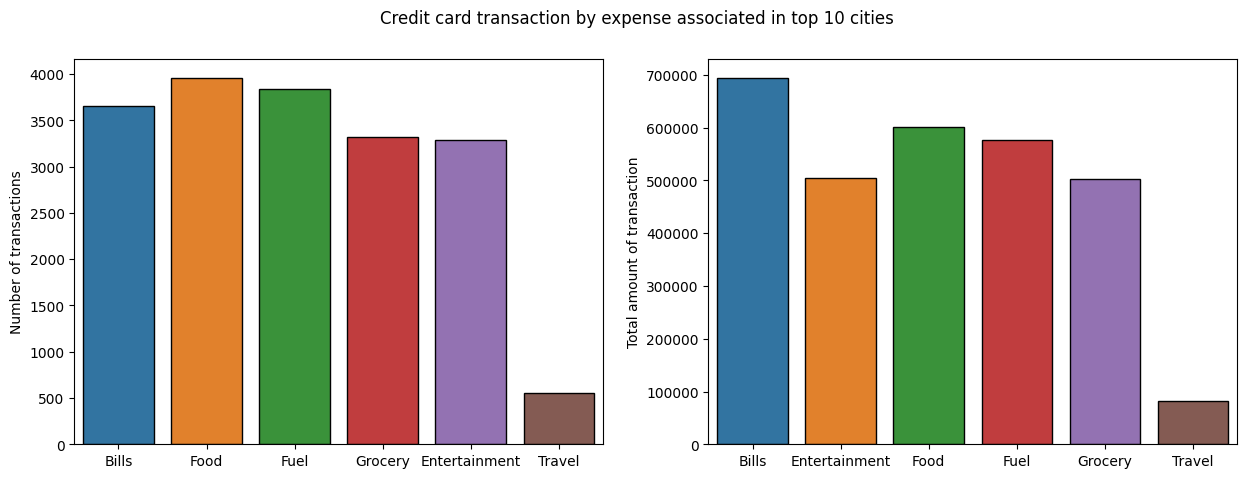

In [ ]:
plt.figure(figsize = (15,5))
plt.suptitle('Credit card transaction by expense associated in top 10 cities')
plt.subplot(121)
plt.title('')
sns.countplot(top_city,x='Exp_type', edgecolor='black')
plt.xlabel(None)
plt.ylabel('Number of transactions')

plt.subplot(122)
plt.title('')
sns.barplot(top_city.groupby('Exp_type')['Amount'].sum().reset_index(),x ='Exp_type', y = 'Amount', edgecolor='black')
plt.xlabel(None)
plt.ylabel('Total amount of transaction')

plt.show()

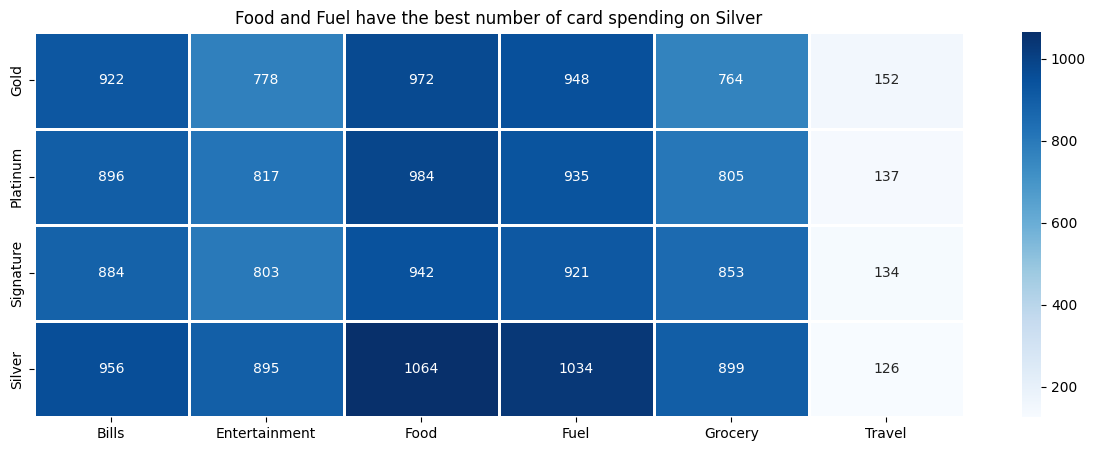

In [ ]:
plot_data = pd.pivot_table(data = top_city,
               index = 'Card_type',
               columns = 'Exp_type',
               values = 'Amount',
               aggfunc = 'count')

plt.figure(figsize=(15,5))
plt.title('Food and Fuel have the best number of card spending on Silver')
sns.heatmap(data = plot_data, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

# 4. Analysis by class cities the Government of India
The classification of Indian cities is a ranking system used by the Government of India, there 3 tier cties:
### *- Tier_X: 8 cities;* 
### *- Tier_Y: 97 cities;*
### *- Tier_Z: All other cities and Towns.*
 
*Source: https://en.wikipedia.org/wiki/Classification_of_Indian_cities#Current_classification:~:text=6%5D%5B7%5D-,HRA%20classification,All%20other%20cities%20and%20other%20country,-Historical%20classification%5B*

In [ ]:
df_tier = df.copy()
df_tier.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n
0,Delhi,2014-10-29,Gold,Bills,F,82.475,October,10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8
2,Bengaluru,2014-08-27,Silver,Bills,F,101.738,August,8
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4
4,Bengaluru,2015-05-05,Gold,Bills,F,171.574,May,5


In [ ]:
#Add class city
X = 'Ahmedabad, Bengaluru, Chennai, Delhi, Hyderabad, Kolkata, Mumbai, Pune'
Y = 'Agra, Ajmer, Aligarh, Amravati, Amritsar, Anand, Asansol, Aurangabad, Bareilly, Belagavi, Berhampore, Bhavnagar, Bhiwandi, Bhopal, Bhubaneswar, Bikaner, Bilaspur, Bokaro Steel City, Burdwan , Chandigarh, Coimbatore, Cuttack, Dahod, Dehradun, Dombivli, Dhanbad, Bhilai, Durgapur, Erode, Faridabad, Ghaziabad, Gorakhpur, Guntur, Gurugram, Guwahati, Gwalior, Hamirpur, Hubballi–Dharwad, Indore, Jabalpur, Jaipur, Jalandhar, Jalgaon, Jammu, Jamnagar, Jamshedpur, Jhansi, Jodhpur, Kalaburagi, Kakinada, Kannur, Kanpur, Karnal, Kochi, Kolhapur, Kollam, Kozhikode, Kurnool, Ludhiana, Lucknow, Madurai, Malappuram, Mathura, Mangaluru, Meerut, Moradabad, Mysuru, Nagpur, Nanded, Nashik, Nellore, Noida, Patna, Puducherry, Purulia, Prayagraj, Raipur, Rajkot, Rajamahendravaram, Ranchi, Rourkela, Ratlam, Salem, Sangli, Shimla, Siliguri, Solapur, Srinagar, Surat, Thanjavur, Thiruvananthapuram, Thrissur, Tiruchirappalli, Tirunelveli, Tiruvannamalai, Ujjain, Vijayapura, Vadodara, Varanasi, Vasai-Virar, Vijayawada, Visakhapatnam, Vellore, Warangal'
def get_kind_city(row):
  if row['City'] in X:
    return 'Tier_X'
  if row['City'] in Y:
    return 'Tier_Y'
  else:
    return 'Tier_Z'
#---------------------------------------------------------
df_tier['Class_city'] =df_tier.apply(get_kind_city, axis =1)

Dataset 986 cities with: 7/8 tier_X cities, 83/91 tier_Y cities and 896 tier_Y cities

In [ ]:
# df_tier['Class_city'].unique()
# df_tier[df_tier['Class_city'] == 'Tier_Z']['City'].nunique()
# df_tier['Class_city'].value_counts()
# df_tier['City'].nunique()

In [ ]:
df_tier.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n,Class_city
0,Delhi,2014-10-29,Gold,Bills,F,82.475,October,10,Tier_X
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8,Tier_Z
2,Bengaluru,2014-08-27,Silver,Bills,F,101.738,August,8,Tier_X
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4,Tier_Z
4,Bengaluru,2015-05-05,Gold,Bills,F,171.574,May,5,Tier_X


In [ ]:
df_tier.groupby(['Class_city'])['City'].nunique()

Class_city
Tier_X      7
Tier_Y     83
Tier_Z    896
Name: City, dtype: int64

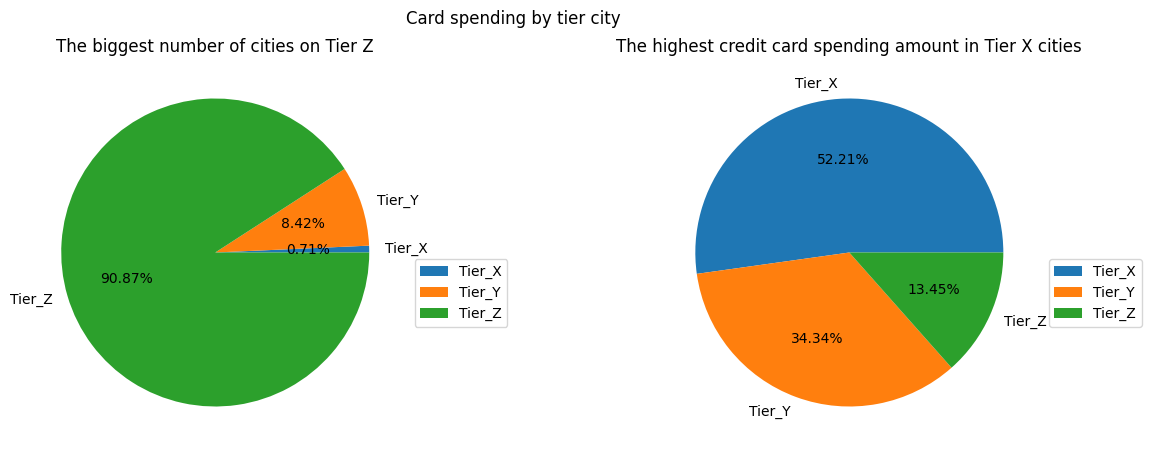

In [ ]:
plt.figure(figsize = (15,5))
plt.suptitle('Card spending by tier city')
plt.subplot(121)
plt.title('The biggest number of cities on Tier Z')
plt.pie(df_tier.groupby(['Class_city'])['City'].nunique(),labels=['Tier_X', 'Tier_Y', 'Tier_Z'],autopct = '%0.2f%%')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.subplot(122)
plt.title('The highest credit card spending amount in Tier X cities')
plt.pie(df_tier['Class_city'].value_counts(),labels=['Tier_X', 'Tier_Y', 'Tier_Z'],autopct = '%0.2f%%')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

plt.show()

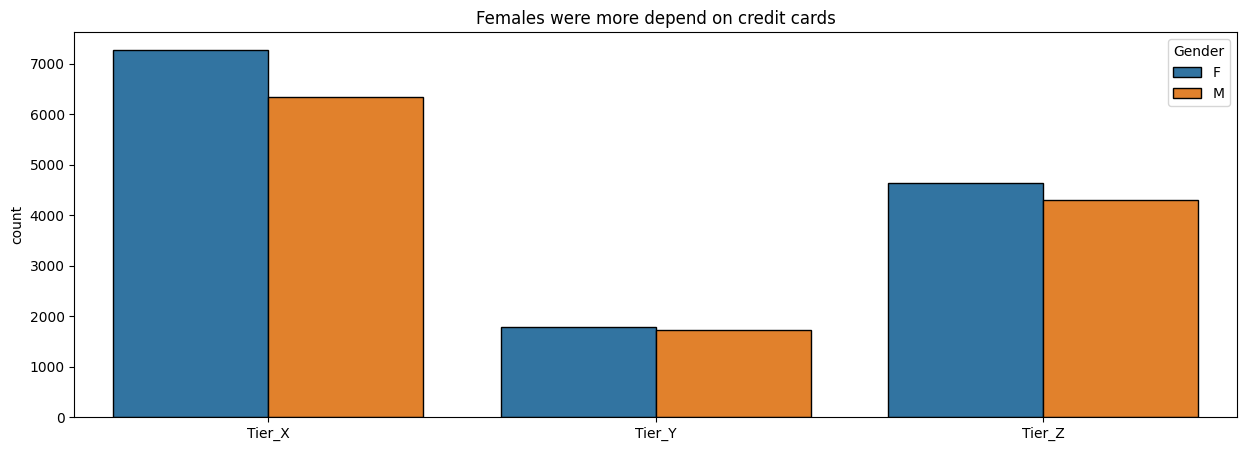

In [ ]:
plt.figure(figsize = (15,5))

plt.title('Females were more depend on credit cards')
sns.countplot(data = df_tier, x = 'Class_city', hue = 'Gender', order =['Tier_X','Tier_Y','Tier_Z'], edgecolor='black')
plt.xlabel(None)

plt.show()

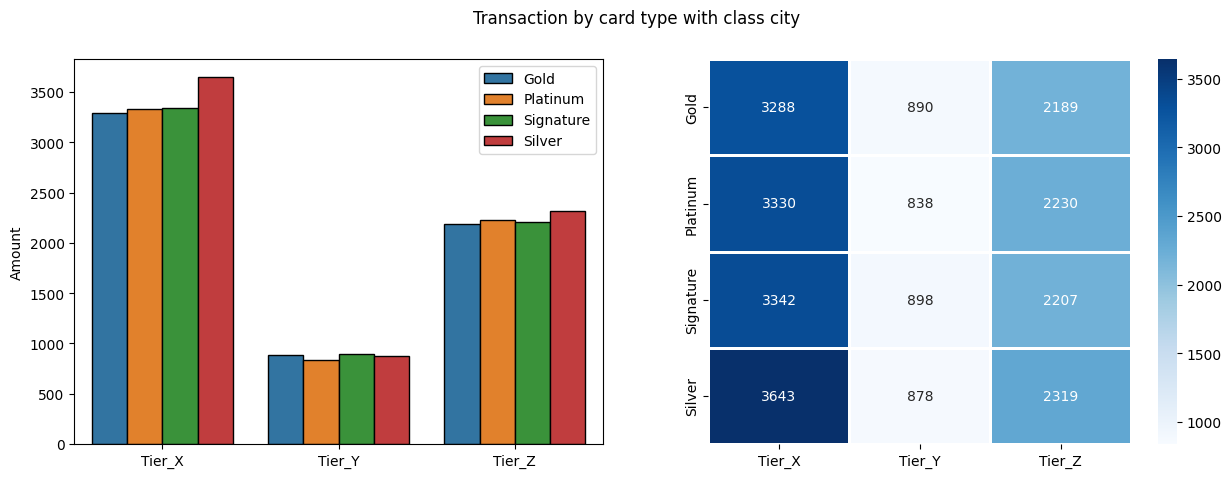

In [ ]:
df_class_city = pd.pivot_table(data = df_tier, index='Card_type', columns='Class_city', values = 'Amount', aggfunc='count')
#Card type by class city
plt.figure(figsize = (15,5))
plt.suptitle('Transaction by card type with class city')

plt.subplot(121)
sns.barplot(data = df_tier.groupby(['Class_city','Card_type'])['Amount'].count().reset_index(), x = 'Class_city', y = 'Amount', hue = 'Card_type', order = ['Tier_X','Tier_Y','Tier_Z'],edgecolor='black')
plt.legend(loc='best')
plt.xlabel(None)

plt.subplot(122)
sns.heatmap(data = df_class_city, cmap = 'Blues', annot = True, fmt = '.0f',linewidths=1, linecolor='white')
plt.xlabel(None)
plt.ylabel(None)

plt.show()

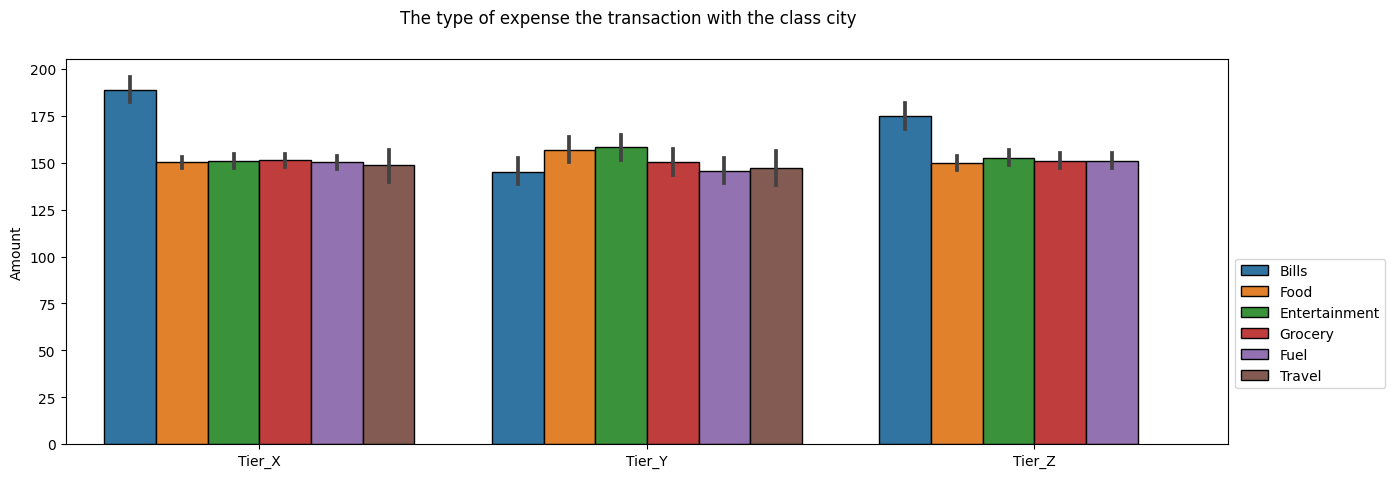

In [ ]:
plt.figure(figsize = (15,5))
plt.suptitle('The type of expense the transaction with the class city')
sns.barplot(data = df_tier, x = 'Class_city', y = 'Amount', hue = 'Exp_type', order = ['Tier_X','Tier_Y','Tier_Z'], edgecolor='black')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.xlabel(None)
plt.show()

In [ ]:
from numba.core.utils import MACHINE_BITS
def check_top(row):
  M = top_city['City'].unique()
  if row['City'] in M:
    return 'Yes'
  else:
    return 'No'

df_tier['Top'] = df_tier.apply(check_top, axis=1)

#  4. Export to Google Sheet Report and Design a Tableau Dashboard

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

In [ ]:
!pip uninstall gspread-dataframe    
# Successfully uninstalled gspread-dataframe-3.0.8

!pip install gspread-dataframe
# Successfully installed gspread-dataframe-3.2.2

In [ ]:
# Mount to Google Sheets
from google.colab import auth

auth.authenticate_user()

# Import neccessary libraries
import gspread
from gspread_dataframe import set_with_dataframe

from google.auth import default
creds, _ = default()

In [ ]:
# Authorize Google Sheets API
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

## Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.

In [ ]:
# Create a new Google Spreadsheets
# sh = gc.create("credit_card_India") # Thay bằng tên spreadsheet của các bạn 

In [ ]:
df.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n
0,Delhi,2014-10-29,Gold,Bills,F,82.475,October,10
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8
2,Bengaluru,2014-08-27,Silver,Bills,F,101.738,August,8
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4
4,Bengaluru,2015-05-05,Gold,Bills,F,171.574,May,5


In [ ]:
top_city.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n
0,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8
1,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4
2,Greater Mumbai,2014-06-26,Platinum,Bills,F,150.980,June,6
3,Greater Mumbai,2013-12-07,Signature,Bills,F,278.036,December,12
4,Greater Mumbai,2014-08-07,Gold,Bills,F,19.226,August,8


In [ ]:
df_tier.head()

,City,Date,Card_type,Exp_type,Gender,Amount,Month,Month_n,Class_city,Top
0,Delhi,2014-10-29,Gold,Bills,F,82.475,October,10,Tier_X,Yes
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32.555,August,8,Tier_Z,Yes
2,Bengaluru,2014-08-27,Silver,Bills,F,101.738,August,8,Tier_X,Yes
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123.424,April,4,Tier_Z,Yes
4,Bengaluru,2015-05-05,Gold,Bills,F,171.574,May,5,Tier_X,Yes


After this step, go to https://docs.google.com/spreadsheets to find your sheet and get the link of it.

In [ ]:
# https://docs.google.com/spreadsheets/d/12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic/edit#gid=0
# key : 12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    # Worksheet(worksheet, data)
    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key
# Notice! Worksheet has to have unique name

# export_data_to_new_sheet('184pJlI5hX4qf2ivT6dkeecGO8MoM7OACGBvh_jc7GOQ','data1', df)
# export_data_to_new_sheet('184pJlI5hX4qf2ivT6dkeecGO8MoM7OACGBvh_jc7GOQ','topcity1', top_city)
export_data_to_new_sheet('1PiyQJNSLyXbj9Gv3tak9KTi8UXs82X780PRd1hiip0s','tiercity1', df_tier)